In [1]:
import os
import pandas as pd

# Define the directory where your Excel files are located
directory_path = 'C:/Users/kuany/Scientific Computing'  # Replace with the actual path to your files

# Initialize an empty list to store dataframes
dataframes = []

# List all the Excel files in the directory
excel_files = [file for file in os.listdir(directory_path) if file.endswith('.xlsx')]

# Loop through each Excel file
for excel_file in excel_files:
    # Extract the year and month from the file name
    year, month = excel_file.split('_top_')[1].split('.')[0].split('_')
    date = f"{year}-{month}"
    
    # Read the Excel file into a dataframe
    df = pd.read_excel(os.path.join(directory_path, excel_file))
    
    # Add a 'Date' column with the extracted date information
    df['Date'] = date
    
    # Append the dataframe to the list
    dataframes.append(df)

# Concatenate all dataframes into one
final_dataframe = pd.concat(dataframes, ignore_index=True)

D:\Conda\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [17]:
final_dataframe

,green500_rank,Rmax,total_power,Mflops/Watt,How?,Year,name,Total Cores,Name,Manufacturer,...,Power Source.1,Power Quality Level,Measured Cores,Optimized Run (HPL),Optimized Run (Peak Power),Site ID,System ID,Power Efficiency [GFlops/Watts],Memory,Energy Efficiency [GFlops/Watts]
0,1.0,125100.0,27.780363,4503.180898,Submission,2013,"LX 1U-4GPU/104Re-1G Cluster, Intel Xeon E5-26...",2720,TSUBAME-KFC,NEC,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,191100.0,52.617600,3631.860000,Submission,2013,"Dell T620 Cluster, Intel Xeon E5-2630v2 6C 2.6...",5120,Wilkes,Dell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,277100.0,78.770000,3517.836740,Submission,2013,"Cray 3623G4-SM Cluster, Intel Xeon E5-2680v2 ...",4864,HA-PACS TCA,Cray Inc.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,5587000.0,1753.660000,3185.908329,Submission,2012,"Cray XC30, Xeon E5-2670 8C 2.600GHz, Aries int...",115984,Piz Daint,Cray Inc.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,254900.0,81.413000,3130.949603,Submission,2013,"Bull R421-E3 Cluster, Intel Xeon E5-2650v2 8C ...",5720,romeo,Bull SA,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaN,NaN,NaN,NaN,NaN,2022,NaN,53568,NaN,NEC,...,NaN,NaN,NaN,NaN,NaN,50955.0,180172.0,NaN,NaN,NaN
9996,NaN,NaN,NaN,NaN,NaN,2023,NaN,445440,Explorer-WUS3,Microsoft Azure,...,NaN,NaN,NaN,NaN,NaN,50957.0,180171.0,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN,2020,NaN,130944,Lyapunov,"NVIDIA, Inspur",...,NaN,NaN,NaN,NaN,NaN,50862.0,180030.0,NaN,NaN,NaN
9998,NaN,NaN,NaN,NaN,NaN,2021,NaN,134912,Galushkin,"YANDEX, NVIDIA",...,NaN,NaN,NaN,NaN,NaN,50862.0,180037.0,NaN,NaN,NaN


In [19]:
import pandas as pd

# Assuming you have a dataframe called concatenated_df
# Calculate the total number of cells in the dataframe
total_cells = final_dataframe.shape[0] * final_dataframe.shape[1]

# Calculate the number of null values in each column
null_counts = final_dataframe.isnull().sum()

# Calculate the percentage of null values in each column
null_percentage = (null_counts / total_cells) * 100

# Create a new dataframe to hold the percentages and column names
null_percentage_df = pd.DataFrame({'Column Name': null_percentage.index, 'Null Percentage': null_percentage.values})

# Sort the dataframe by the Null Percentage column in ascending order
null_percentage_df = null_percentage_df.sort_values(by='Null Percentage')

# Reset the index of the sorted dataframe
null_percentage_df.reset_index(drop=True, inplace=True)
null_percentage_df

,Column Name,Null Percentage
0,Processor,0.000000
1,Segment,0.000000
2,Accelerator/Co-Processor,0.000000
3,Country,0.000000
4,Site,0.000000
...,...,...
67,Optimized Run (HPL),1.365417
68,Optimized Run (Peak Power),1.370000
69,Notes,1.386528
70,Memory,1.388194


In [20]:
# Filter the DataFrame to keep only rows where Null Percentage is 0.00
columns_with_no_nulls = null_percentage_df[null_percentage_df['Null Percentage'] == 0.00]

# Display the column names with 0.00 null percentage
column_names_with_no_nulls = columns_with_no_nulls['Column Name']
column_names_with_no_nulls

0                    Processor
1                      Segment
2     Accelerator/Co-Processor
3                      Country
4                         Site
5             Cores per Socket
6                 Manufacturer
7                    OS Family
8         Processor Generation
9                 System Model
10                        Year
11         Interconnect Family
12                Interconnect
13                   Continent
14                        Date
15                 Total Cores
16                Architecture
Name: Column Name, dtype: object

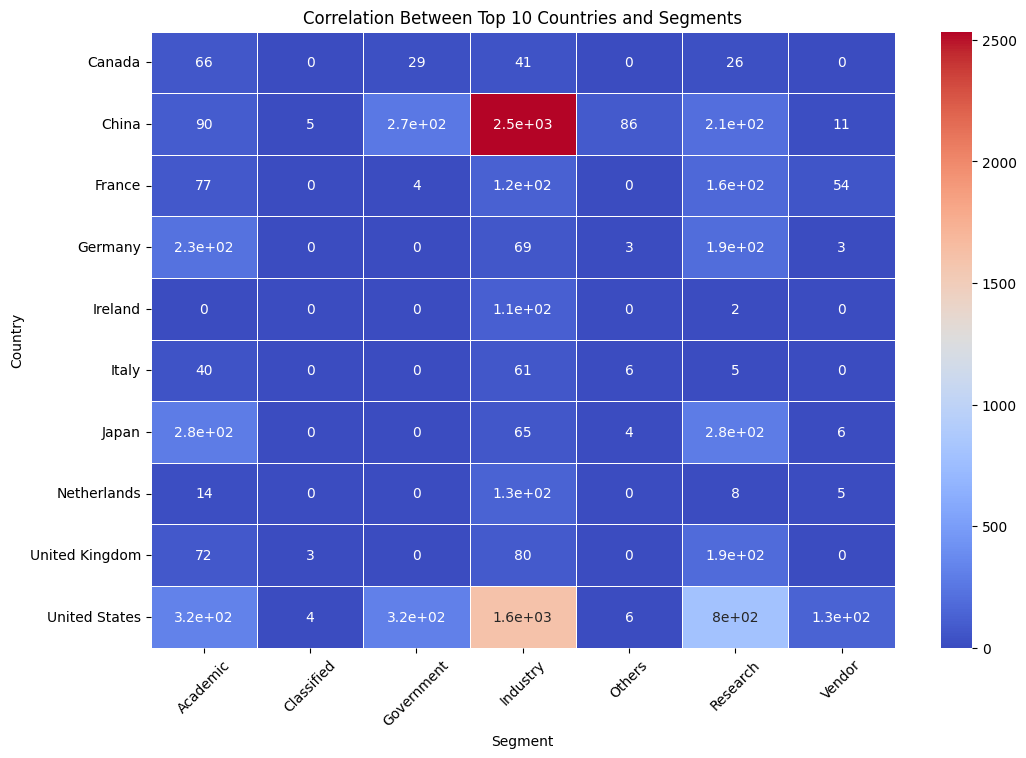

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the final_dataframe with 'Segment' and 'Country' columns

# Get the top 10 most frequent countries
top_10_countries = final_dataframe['Country'].value_counts().head(10).index.tolist()

# Filter the dataframe for the top 10 countries
filtered_df = final_dataframe[final_dataframe['Country'].isin(top_10_countries)]

# Group the filtered data by 'Segment' and 'Country', and count the occurrences
grouped_data = filtered_df.groupby(['Segment', 'Country']).size().reset_index(name='Count')

# Pivot the data to create a matrix for the heatmap
pivot_table = grouped_data.pivot_table(index='Country', columns='Segment', values='Count', aggfunc='sum', fill_value=0)

# Calculate the correlation between countries and segments
corr = pivot_table.corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Between Top 10 Countries and Segments')
plt.xlabel('Segment')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.show()


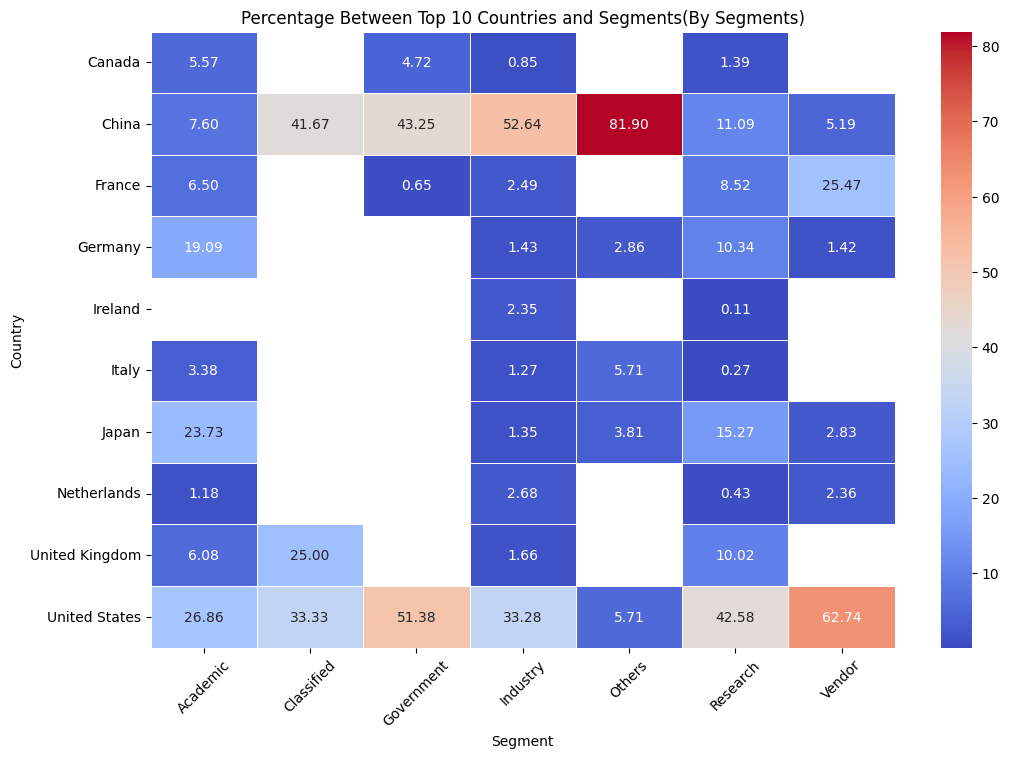

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you already have the final_dataframe with 'Segment' and 'Country' columns

# Get the top 10 most frequent countries
top_10_countries = final_dataframe['Country'].value_counts().head(10).index.tolist()

# Filter the dataframe for the top 10 countries
filtered_df = final_dataframe[final_dataframe['Country'].isin(top_10_countries)]

# Group the filtered data by 'Segment' and 'Country', and count the occurrences
grouped_data = filtered_df.groupby(['Segment', 'Country']).size().reset_index(name='Count')

# Pivot the data to create separate columns for segments
pivot_table = grouped_data.pivot(index='Country', columns='Segment', values='Count')

# Calculate the percentage of each combination (country-segment) based on total segment counts
percentage_matrix = pivot_table.divide(pivot_table.sum(axis=0), axis=1) * 100

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(percentage_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Percentage Between Top 10 Countries and Segments(By Segments)')
plt.xlabel('Segment')
plt.ylabel('Country')
plt.xticks(rotation=45)
plt.show()

In [52]:
import pandas as pd

# Assuming you already have the final_dataframe with 'Country' column

# Count the occurrences of each country in the entire dataframe
country_counts = final_dataframe['Country'].value_counts()

# Get the top 10 most frequent countries
top_10_countries = country_counts.head(10).index.tolist()

# Calculate the frequency percentage for each of the top 10 countries
frequency_percentages = (country_counts[top_10_countries] / len(final_dataframe)) * 100

# Sum up all the frequency percentages
total_percentage = frequency_percentages.sum()

# Display the total percentage
print(f'Total Percentage: {total_percentage:.2f}%')


Total Percentage: 88.09%


In [64]:
frequency_percentages

China             31.99
United States     31.74
Japan              6.41
Germany            4.94
France             4.14
United Kingdom     3.42
Canada             1.62
Netherlands        1.56
Ireland            1.15
Italy              1.12
Name: Country, dtype: float64

In [56]:
# Assuming you have a DataFrame called 'final_dataframe' with a 'Processor' column

# Create a new column 'Processor_Family' by extracting the first word from the 'Processor' column
final_dataframe['Processor_Family'] = final_dataframe['Processor'].str.split().str[0]

# Rename 'Xeon' to 'Intel' and 'A64FX' to 'Fujitsu' in the 'Processor_Family' column
final_dataframe['Processor_Family'] = final_dataframe['Processor_Family'].replace({'Xeon': 'Intel', 'A64FX': 'Fujitsu', 'SPARC64': 'Fujitsu','POWER7': 'IBM', 'Power': 'IBM','Opteron': 'AMD', "Cavium":"Marvell", "EPYC":"AMD"  })

# Display the updated DataFrame
print(final_dataframe[['Processor', 'Processor_Family']])

                               Processor Processor_Family
0       Intel Xeon E5-2620v2 6C 2.100GHz            Intel
1       Intel Xeon E5-2630v2 6C 2.600GHz            Intel
2     Intel Xeon E5-2680v2  10C 2.800GHz            Intel
3               Xeon E5-2670 8C 2.600GHz            Intel
4      Intel Xeon E5-2650v2  8C 2.600GHz            Intel
...                                  ...              ...
9995       Xeon Platinum 8358 32C 2.6GHz            Intel
9996           AMD EPYC 7V12 48C 2.45GHz              AMD
9997              AMD EPYC 7662 64C 2GHz              AMD
9998              AMD EPYC 7702 64C 2GHz              AMD
9999              AMD EPYC 7702 64C 2GHz              AMD

[10000 rows x 2 columns]


In [57]:
# Assuming you have a DataFrame called 'final_dataframe' with a 'Processor_Family' column

# Get all the different Processor_Family values
unique_processor_families = final_dataframe['Processor_Family'].unique()

# Print the unique Processor_Family values
for family in unique_processor_families:
    print(family)


Intel
IBM
AMD
Fujitsu
ShenWei
PowerPC
NEC
Sunway
Hygon
Marvell
Vector


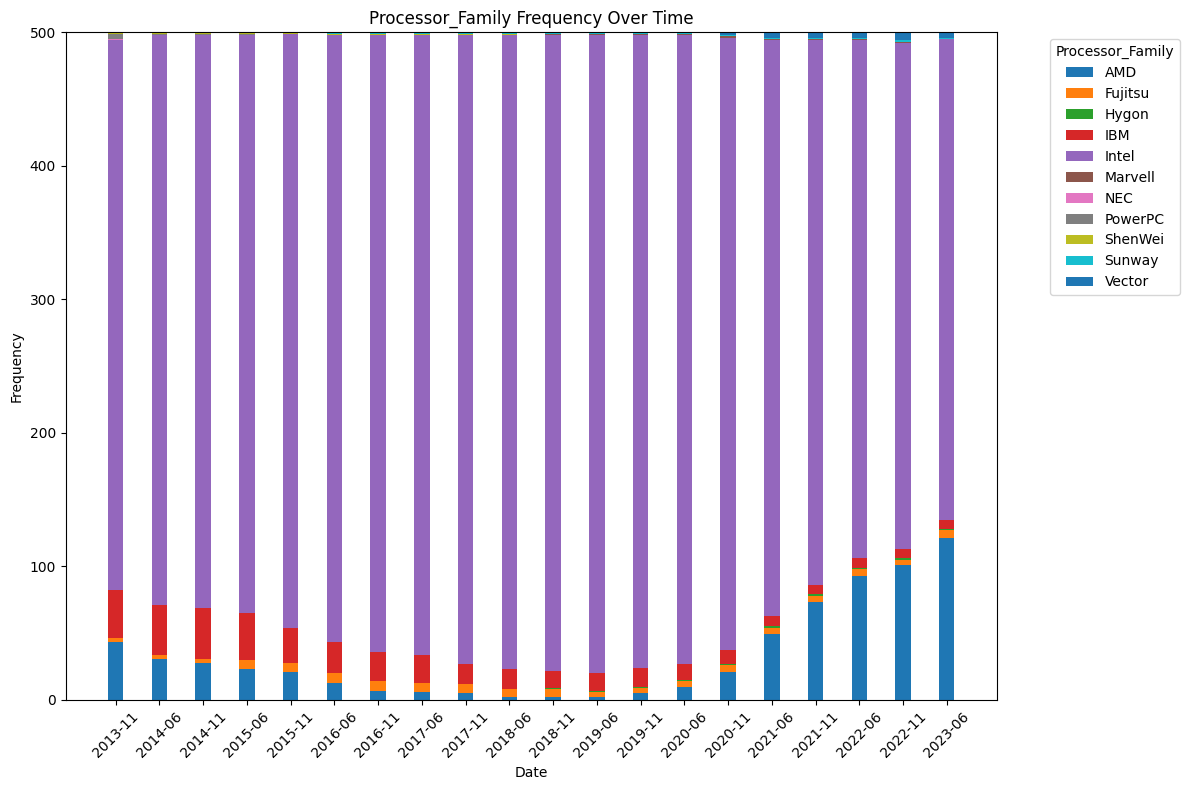

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a DataFrame called 'final_dataframe' with 'Date' and 'Processor_Family' columns

# Group the data by 'Date' and 'Processor_Family', and count the occurrences
family_counts = final_dataframe.groupby(['Date', 'Processor_Family']).size().reset_index(name='Count')

# Pivot the data to create a matrix for the stacked bar plot
pivot_table = family_counts.pivot(index='Date', columns='Processor_Family', values='Count').fillna(0)

# Get unique dates and Processor_Family values
unique_dates = pivot_table.index
unique_families = pivot_table.columns

# Create a stacked bar plot
width = 0.35  # Width of each bar
x = np.arange(len(unique_dates))  # x-axis values for each date

fig, ax = plt.subplots(figsize=(12, 8))

bottom = np.zeros(len(unique_dates))

for family in unique_families:
    counts = pivot_table[family]
    ax.bar(x, counts, width, label=family, bottom=bottom)
    bottom += counts

ax.set_title('Processor_Family Frequency Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Frequency')
ax.set_xticks(x)
ax.set_xticklabels(unique_dates, rotation=45)
ax.legend(title='Processor_Family', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


C:\Users\kuany\AppData\Local\Temp\ipykernel_716\3500183920.py:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


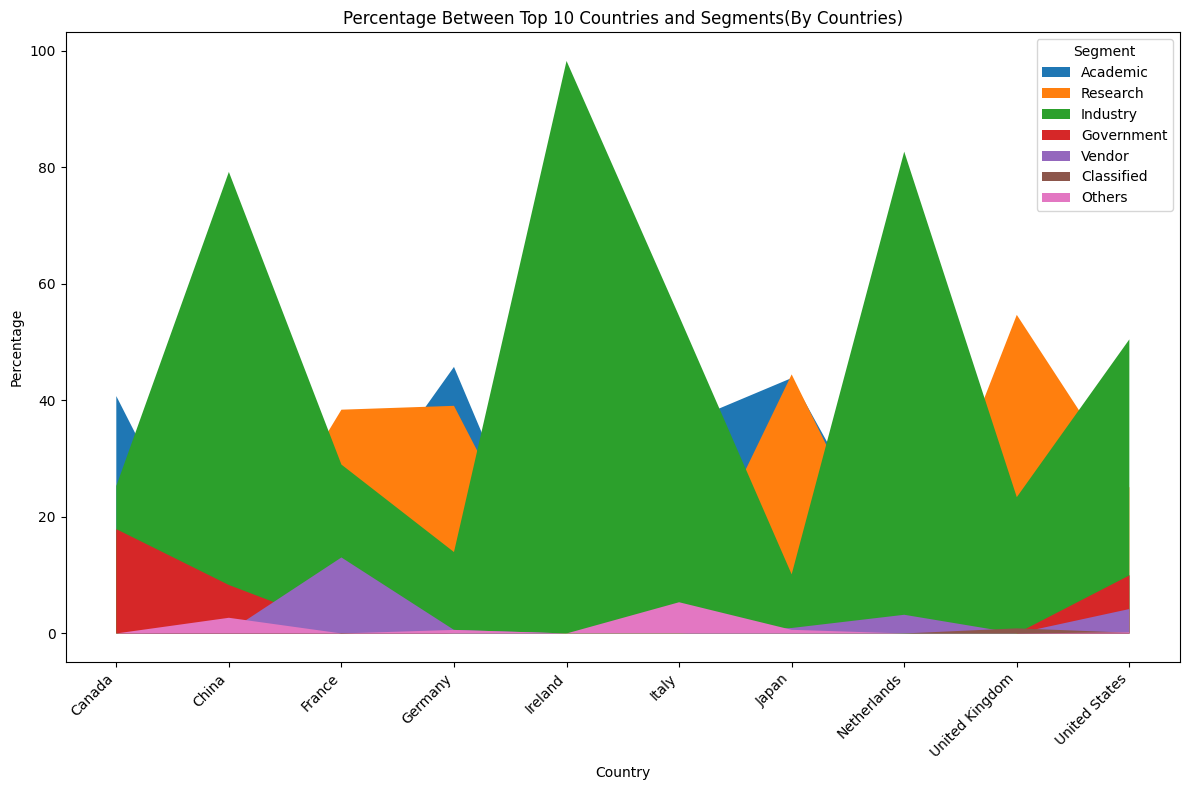

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame called 'final_dataframe' with 'Date', 'Segment', and 'Country' columns

# Get the top 5 most frequent countries
top_5_countries = final_dataframe['Country'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only the top 5 countries
filtered_dataframe = final_dataframe[final_dataframe['Country'].isin(top_5_countries)]

# Group the data by 'Segment' and 'Country', and count the occurrences
grouped_data = filtered_dataframe.groupby(['Segment', 'Country']).size().reset_index(name='Count')

# Pivot the data to create a matrix for the stacked area plot
pivot_table = grouped_data.pivot_table(index='Country', columns='Segment', values='Count', aggfunc='sum', fill_value=0)

# Calculate the percentage of each combination (country-segment) based on total segment counts
percentage_matrix = pivot_table.div(pivot_table.sum(axis=1), axis=0) * 100

# Get unique segments
unique_segments = final_dataframe['Segment'].unique()

# Create a stacked area plot for each segment
fig, ax = plt.subplots(figsize=(12, 8))

for segment in unique_segments:
    segment_data = percentage_matrix[segment]
    ax.fill_between(segment_data.index, segment_data.values, label=segment)

ax.set_title('Percentage Between Top 10 Countries and Segments(By Countries)')
ax.set_xlabel('Country')
ax.set_ylabel('Percentage')
ax.legend(title='Segment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


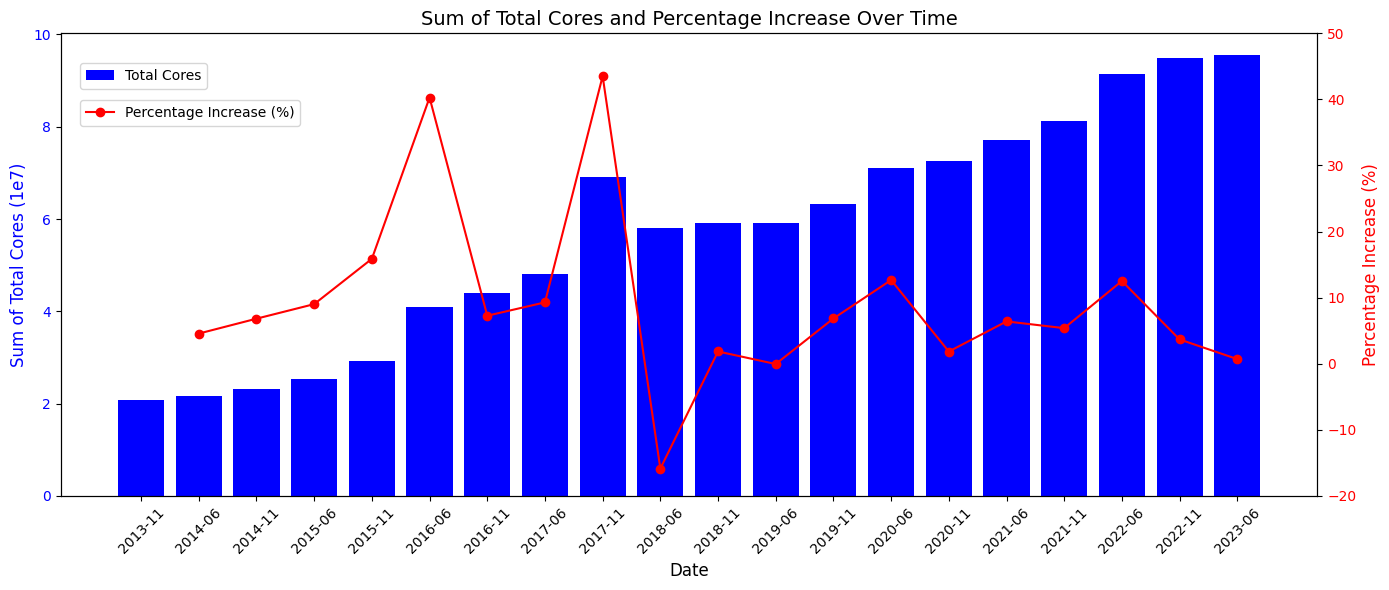

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Assuming you have a DataFrame called 'final_dataframe' with 'Date' and 'Total Cores' columns

# Group by 'Date' and calculate the sum of 'Total Cores' for each date
total_cores_sum = final_dataframe.groupby('Date')['Total Cores'].sum().reset_index()

# Calculate the percentage increase compared to the previous date
total_cores_sum['Percentage Increase'] = total_cores_sum['Total Cores'].pct_change() * 100

# Create a figure with two subplots, adjusting the figsize and spacing
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot the sum of total cores on the first subplot
ax1.bar(total_cores_sum['Date'], total_cores_sum['Total Cores'], color='blue', label='Total Cores')
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Sum of Total Cores (1e7)', color='blue', fontsize=12)
ax1.tick_params(axis='y', labelcolor='blue', labelsize=10)
ax1.tick_params(axis='x', labelrotation=45, labelsize=10)

# Create a second subplot sharing the same x-axis
ax2 = ax1.twinx()
ax2.plot(total_cores_sum['Date'], total_cores_sum['Percentage Increase'], marker='o', color='red', label='Percentage Increase (%)')
ax2.set_ylabel('Percentage Increase (%)', color='red', fontsize=12)
ax2.tick_params(axis='y', labelcolor='red', labelsize=10)
ax2.set_ylim(-20, 50)  # Set the range of the percentage y-axis

# Set titles and labels
plt.title('Sum of Total Cores and Percentage Increase Over Time', fontsize=14)

# Add legends
ax1.legend(loc='upper left', bbox_to_anchor=(0.01, 0.95))
ax2.legend(loc='upper left', bbox_to_anchor=(0.01, 0.87))

# Format y-axis labels for 'Total Cores' using a function to divide by 1e7
def format_yaxis(y, pos):
    return '{:.0f}'.format(y / 1e7)

ax1.yaxis.set_major_formatter(FuncFormatter(format_yaxis))

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()


In [88]:
total_cores_sum

,Date,Total Cores,Percentage Increase
0,2013-11,20720693,NaN
1,2014-06,21666731,4.565668
2,2014-11,23144173,6.818943
3,2015-06,25231890,9.020486
4,2015-11,29237895,15.876754
5,2016-06,41015113,40.280663
6,2016-11,43995386,7.266280
7,2017-06,48079790,9.283710
8,2017-11,69004640,43.521093
9,2018-06,58055634,-15.867058


In [113]:
# Assuming you have a DataFrame called 'final_dataframe' with a 'Processor_Family' column

# Get all the different Processor_Family values
unique_processor_families = final_dataframe['Segment'].unique()

# Print the unique Processor_Family values
for family in unique_processor_families:
    print(family)

Academic
Research
Industry
Government
Vendor
Classified
Others


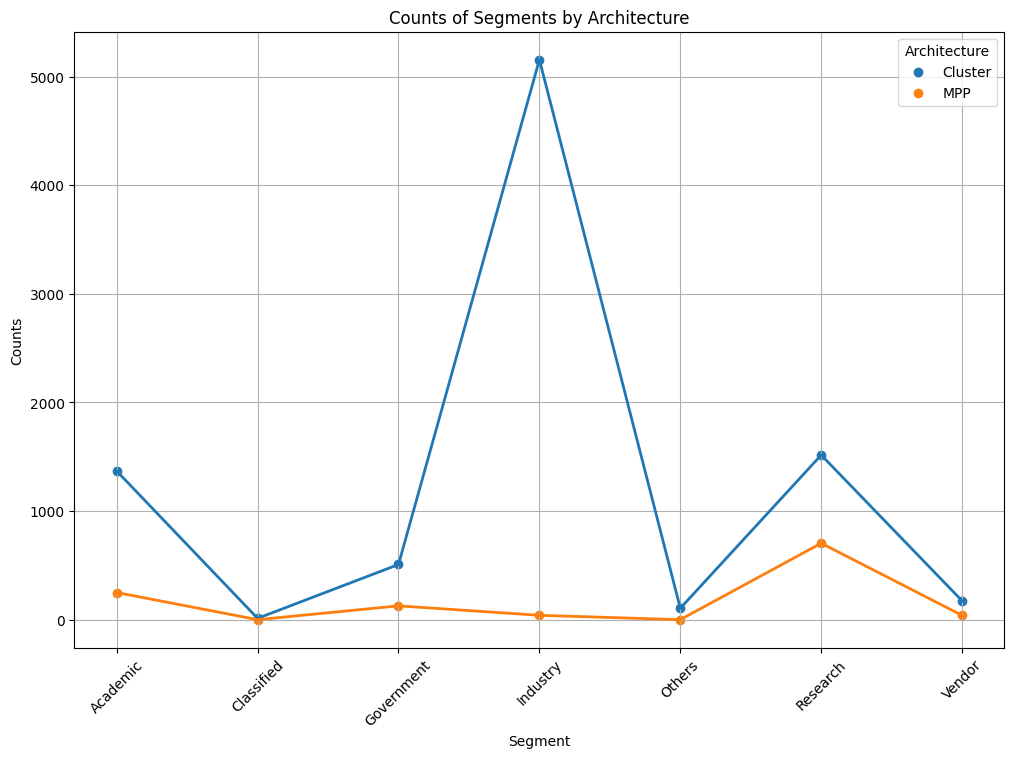

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'final_dataframe' with 'Architecture' and 'Segment' columns

# Create a cross-tabulation to count occurrences of each combination
cross_tab = pd.crosstab(final_dataframe['Segment'], final_dataframe['Architecture'])

# Set the figure size
plt.figure(figsize=(12, 8))

# Loop through each 'Architecture' type
for architecture in cross_tab.columns:
    plt.scatter(cross_tab.index, cross_tab[architecture], label=architecture, marker='o')

# Connect the points with lines
for architecture in cross_tab.columns:
    plt.plot(cross_tab.index, cross_tab[architecture], marker='', linestyle='-', linewidth=2)

# Set labels and title
plt.xlabel('Segment')
plt.ylabel('Counts')
plt.title('Counts of Segments by Architecture')

# Show the plot
plt.xticks(rotation=45)
plt.legend(title='Architecture')
plt.grid(True)
plt.show()


In [106]:
pivot_df

Segment      Academic     Classified Government     Industry      Others  \
Architecture  Cluster MPP    Cluster    Cluster MPP  Cluster MPP Cluster   
Date                                                                       
2013-11            60  23          3         14   2      280   2       1   
2014-06            62  21          0         15   3      276   2       1   
2014-11            71  17          0         17   6      252   3       1   
2015-06           100  15          0         22   6      206   4       1   
2015-11            89  20          0         22   8      228   2       0   
2016-06            76  18          1         35   8      242   2       0   
2016-11            77  18          3         33   7      243   2       0   
2017-06            78  17          3         29   9      249   2       0   
2017-11            60  16          2         23   7      273   2       0   
2018-06            50  14          0         20   7      282   2       0   
2018-11            44  12          0         36   7      274   1       5   
2019-06            52   7          0         34   4      291   1       4   
2019-11            53   4          0         32   4      291   1       6   
2020-06            59   4          0         33   6      287   1      10   
2020-11            62   4          0         30   4      273   1      14   
2021-06            68   5          0         27   7      262   2      13   
2021-11            69   7          0         23   8      256   2      12   
2022-06            77   9          0         25   8      233   2      13   
2022-11            77  10          0         21   8      231   3      12   
2023-06            85   9          0         17   8      228   3      12   

Segment      Research      Vendor      
Architecture  Cluster MPP Cluster MPP  
Date                                   
2013-11            60  43       5   7  
2014-06            69  40       5   6  
2014-11            78  40      10   5  
2015-06            93  37      12   4  
2015-11            83  42       4   2  
2016-06            72  39       5   2  
2016-11            68  39       8   2  
2017-06            67  39       6   1  
2017-11            72  37       7   1  
2018-06            80  39       5   1  
2018-11            78  37       5   1  
2019-06            68  34       4   1  
2019-11            69  32       7   1  
2020-06            67  28       4   1  
2020-11            77  26       8   1  
2021-06            77  26      12   1  
2021-11            82  26      15   0  
2022-06            84  32      17   0  
2022-11            88  33      16   1  
2023-06            84  35      18   1

In [98]:
pivot_df

Architecture,Cluster,MPP
Date,,
2013-11,423,77
2014-06,428,72
2014-11,429,71
2015-06,434,66
2015-11,426,74
2016-06,431,69
2016-11,432,68
2017-06,432,68
2017-11,437,63
